In [13]:
import numpy as np
import pandas as pd
import matplotlib.image as image
import glob
import os

In [14]:
images_folder='D:/Pets/images'
image_names=[os.path.basename(file) for file in glob.glob(os.path.join(images_folder,'*.jpg'))]
labels=[' '.join(name.split('_')[:-1:]) for name in image_names]
labels

['Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssini

In [16]:
l=pd.Series(labels)
l

0              Abyssinian
1              Abyssinian
2              Abyssinian
3              Abyssinian
4              Abyssinian
              ...        
7385    yorkshire terrier
7386    yorkshire terrier
7387    yorkshire terrier
7388    yorkshire terrier
7389    yorkshire terrier
Length: 7390, dtype: object

In [17]:
lbl_unique=l.unique()
lbl_unique

array(['Abyssinian', 'american bulldog', 'american pit bull terrier',
       'basset hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer',
       'British Shorthair', 'chihuahua', 'Egyptian Mau',
       'english cocker spaniel', 'english setter', 'german shorthaired',
       'great pyrenees', 'havanese', 'japanese chin', 'keeshond',
       'leonberger', 'Maine Coon', 'miniature pinscher', 'newfoundland',
       'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian Blue',
       'saint bernard', 'samoyed', 'scottish terrier', 'shiba inu',
       'Siamese', 'Sphynx', 'staffordshire bull terrier',
       'wheaten terrier', 'yorkshire terrier'], dtype=object)

In [18]:
len(l.unique())

37

In [19]:
def encode(lbl):
    for i in range(37):
        if lbl==lbl_unique[i]:
            return i

In [20]:
encode('havanese') #checking the encoder function

16

In [21]:
#checking the encoder function
for i in range(len(lbl_unique)):
    print(lbl_unique[i],"=",encode(lbl_unique[i]))

Abyssinian = 0
american bulldog = 1
american pit bull terrier = 2
basset hound = 3
beagle = 4
Bengal = 5
Birman = 6
Bombay = 7
boxer = 8
British Shorthair = 9
chihuahua = 10
Egyptian Mau = 11
english cocker spaniel = 12
english setter = 13
german shorthaired = 14
great pyrenees = 15
havanese = 16
japanese chin = 17
keeshond = 18
leonberger = 19
Maine Coon = 20
miniature pinscher = 21
newfoundland = 22
Persian = 23
pomeranian = 24
pug = 25
Ragdoll = 26
Russian Blue = 27
saint bernard = 28
samoyed = 29
scottish terrier = 30
shiba inu = 31
Siamese = 32
Sphynx = 33
staffordshire bull terrier = 34
wheaten terrier = 35
yorkshire terrier = 36


In [22]:
features=[]
labels=[]

In [23]:
img_size=(224,224)

In [24]:
import tensorflow as tf

In [25]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import cv2

In [28]:
image_names

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [29]:
for name in image_names:
    label=' '.join(name.split('_')[:-1:])
    encoded_lbl=encode(label)
    if encoded_lbl!=None:
        img=cv2.imread(os.path.join(images_folder,name))
        if img is None:continue
        img=cv2.resize(img,img_size)
        image=np.array(img)
        features.append(image)
        labels.append(encoded_lbl)

In [30]:
print(features[:10])

[array([[[26, 38, 29],
        [27, 38, 30],
        [27, 38, 30],
        ...,
        [40, 53, 45],
        [38, 51, 43],
        [36, 49, 41]],

       [[26, 37, 29],
        [27, 38, 30],
        [29, 40, 32],
        ...,
        [41, 54, 46],
        [39, 52, 45],
        [38, 51, 43]],

       [[26, 37, 29],
        [28, 39, 31],
        [30, 41, 33],
        ...,
        [42, 55, 47],
        [40, 53, 45],
        [39, 52, 44]],

       ...,

       [[11, 19, 12],
        [12, 20, 13],
        [12, 20, 13],
        ...,
        [16, 27, 19],
        [14, 25, 17],
        [13, 24, 16]],

       [[10, 18, 11],
        [10, 18, 11],
        [12, 20, 13],
        ...,
        [14, 25, 17],
        [13, 24, 16],
        [12, 23, 15]],

       [[10, 18, 11],
        [ 9, 17, 10],
        [12, 20, 13],
        ...,
        [12, 23, 15],
        [12, 23, 15],
        [12, 23, 15]]], dtype=uint8), array([[[10, 12,  9],
        [10, 11,  9],
        [ 9,  9,  9],
        ...,
        [95

In [31]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [32]:
features_array=np.array(features)
labels_array=np.array(labels)

In [33]:
labels_one_hot=pd.get_dummies(labels_array)
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#Train-65%+val=25%andtest:20%
X_train,X_test,Y_train,Y_test=train_test_split(features_array,labels_one_hot,test_size=0.2,random_state=42)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.25,random_state=1)

In [36]:
from keras import layers,Input,Model
from keras.models import Sequential
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import RandomFlip,RandomRotation,Dense,Dropout 
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

In [47]:
data_augmentation=Sequential([RandomFlip("horizontal_and_vertical"),RandomRotation(0.2)])
prediction_layers=Dense(37,activation='Softmax')

In [48]:
resnet_model=ResNet50(include_top=False,pooling='avg',weights='imagenet')
resnet_model.trainable=False

In [49]:
#Model Building
inputs=Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=preprocess_input(x)
x=resnet_model(x,training=False)
x=Dropout(0.2)(x)
outputs=prediction_layers(x)
model=Model(inputs,outputs)


In [50]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_5  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_5 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0   

In [51]:
model.compile(optimizer='adam',loss=CategoricalCrossentropy(),metrics=['accuracy'])

In [46]:
Y_train.shape


(4430, 37)

In [52]:
model_history=model.fit(x=X_train,y=Y_train,validation_data=(X_val,Y_val),epochs=10)
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs_range=range(10)

Epoch 1/10


139/139 [==============================] - 1067s 8s/step - loss: 2.2251 - accuracy: 0.3878 - val_loss: 0.9729 - val_accuracy: 0.6926
Epoch 2/10
139/139 [==============================] - 974s 7s/step - loss: 1.1505 - accuracy: 0.6497 - val_loss: 0.7380 - val_accuracy: 0.7448
Epoch 3/10
139/139 [==============================] - 972s 7s/step - loss: 0.9446 - accuracy: 0.7016 - val_loss: 0.6316 - val_accuracy: 0.7881
Epoch 4/10
139/139 [==============================] - 996s 7s/step - loss: 0.7901 - accuracy: 0.7447 - val_loss: 0.6053 - val_accuracy: 0.8009
Epoch 5/10
139/139 [==============================] - 1019s 7s/step - loss: 0.7184 - accuracy: 0.7736 - val_loss: 0.5759 - val_accuracy: 0.7996
Epoch 6/10
139/139 [==============================] - 1032s 7s/step - loss: 0.6422 - accuracy: 0.7883 - val_loss: 0.5772 - val_accuracy: 0.8104
Epoch 7/10
139/139 [==============================] - 3155s 23s/step - loss: 0.6046 - accuracy: 0.8160 - val_loss: 0.5924 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

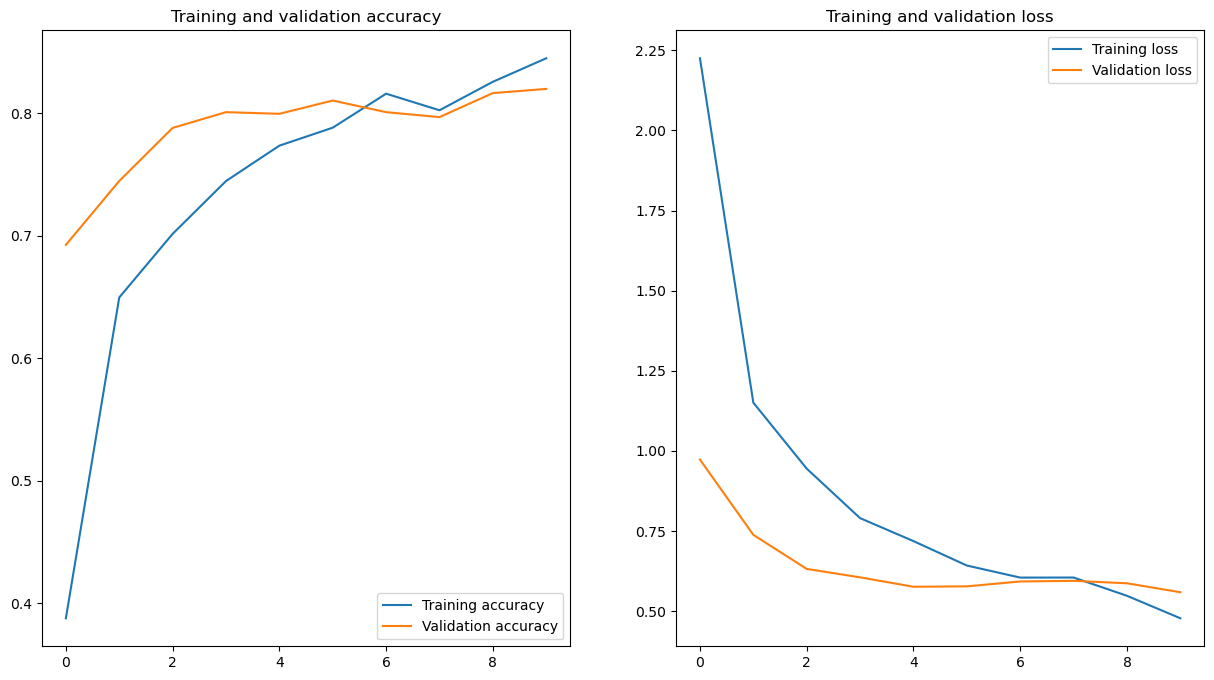

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,accuracy,label='Training accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')

In [55]:
model.evaluate(X_test,Y_test)

47/47 [==============================] - 150s 3s/step - loss: 0.5234 - accuracy: 0.8314


[0.5233982801437378, 0.831415057182312]

In [56]:
y_prediction=model.predict(X_test)
y_prediction

47/47 [==============================] - 144s 3s/step


array([[2.19715305e-11, 1.87036073e-06, 8.34579694e-09, ...,
        1.05276436e-08, 2.66069242e-06, 7.30866461e-08],
       [1.24544976e-03, 9.25546192e-06, 4.89161721e-05, ...,
        1.45352742e-05, 3.86096217e-04, 4.85679656e-02],
       [1.18763965e-05, 2.99571955e-04, 1.40209333e-03, ...,
        1.52094588e-02, 3.62807185e-07, 1.82107251e-05],
       ...,
       [8.33108847e-04, 8.03028306e-05, 3.10669362e-04, ...,
        3.07837792e-04, 1.96453519e-04, 3.05183494e-05],
       [1.05400746e-08, 1.99048836e-02, 2.05166361e-05, ...,
        7.25142017e-05, 3.15842215e-08, 1.51247136e-07],
       [1.37522306e-07, 2.24936826e-04, 2.39470755e-04, ...,
        5.75193670e-03, 2.06538771e-05, 9.48159897e-04]], dtype=float32)